In [1]:
#importamos las herramientas necesarias
import pynbody
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import optimize
import scipy.stats
from astropy import units as unit
import sys
from matplotlib.animation import FuncAnimation
import funciones_masa_acumulada as facma
import pandas as pd
import math
from scipy.optimize import leastsq

In [2]:
#importamos los datos
data_nuevo = '/media/danna01/Disk/SNAPSHOTS/Galaxias_Nuevas'
data_viejo = '/media/danna01/Disk/SNAPSHOTS/Galaxias_Viejas'
#datadir = '/media/juan/Pesquisa/Simulations_Chris_2021'

In [3]:
# Estos son los diccionarios que definen los limites que seran utilizados para los plots de las galaxias para los
# calculos de densidad de materia oscura y la masa acumulada a diferentes radios para la amteria oscura tambien
dicti = {}
galaxies = ['G0', 'G1', 'G2', 'G3']
# Estos son los limites para graficar la masa acumulada y la densidad; sus valores corresponden a 10 veces el valor
# del scale - lenght de cada galaxia.
limites_star = {'G0':(0,10), 'G1':(0,15), 'G2':(0,20), 'G3':(0,25)} #kpc
limites_gas = {'G0':(0,25), 'G1':(0,35), 'G2':(0,50), 'G3':(0,80)} #kpc
# Aca observamos los limites que se usaran para calcular el valor de 'h' que nos indicara que tan bueno es el ajuste
# limites --> De que dependen?

### FUNCIONES

*Las funciones fueron definidas previamente y esta es la lista de funciones de la seccion.*

*En caso de que desee entender mas sobre la funcion por favor utilizar la herramienta de help o dirigirse al documento funciones_masa_acumulada.py*

 1) facma.accumulated_mass
 
 2) facma.plot_mass
 
 3) facma.plot_gas

In [4]:
def accumulated_mass(pos,mass,n,limits):
    r = np.sqrt((pos[:,:2]**2).sum(axis=1))
 
    histo_acum = scipy.stats.cumfreq(r, n, limits, weights=mass)
   
    positions = histo_acum[1]+ np.arange(1,n+1) * histo_acum[2]
    
    return positions, histo_acum[0]

In [5]:
def plot_mass(filename):
    fig = plt.figure(figsize=(10, 7))
    
    for snap in np.arange(300,500,200):
        snap = str(snap).zfill(3) 
        try:
            data_viejo_ruta_100 = pynbody.load(data_viejo+'/'+gal+'/snapshot_100.hdf5')
            binsold, massold = accumulated_mass(data_viejo_ruta_100.star['pos'],data_viejo_ruta_100.star['mass'],
                          n=int(limites_star[gal][1]*5),limits=limites_star[gal])
            plt.plot(binsold,massold,'-r', label= 'Old Galaxies')
            
            data_viejo_ruta = pynbody.load(data_viejo+'/'+gal+'/snapshot_'+snap+'.hdf5')
            binsold, massold =accumulated_mass(data_viejo_ruta.star['pos'],data_viejo_ruta.star['mass'],
                              n=int(limites_star[gal][1]*5),limits=limites_star[gal])
            plt.plot(binsold,massold,'-r')
       
        except:
            pass
    
    data_nuevo_ruta_000 = pynbody.load(data_nuevo+'/'+gal+'/snapshot_000.hdf5')
    binsnew, massnew = accumulated_mass(data_nuevo_ruta_000.star['pos'],data_nuevo_ruta_000.star['mass'],
                                        n=int(limites_star[gal][1]*5),limits=limites_star[gal]) 
    plt.plot(binsnew,massnew,'-k',alpha=0.2,label= 'New Galaxies')   
    
    for snap in np.arange(1,600,1): 
        snap = str(snap).zfill(3)
        data_nuevo_ruta = pynbody.load(data_nuevo+'/'+gal+'/snapshot_'+snap+'.hdf5')
        binsnew, massnew = accumulated_mass(data_nuevo_ruta.star['pos'],data_nuevo_ruta.star['mass'],
                                            n=int(limites_star[gal][1]*5),limits=limites_star[gal]) 
        plt.plot(binsnew,massnew,'-k',alpha=0.2)
   
    plt.title('Masa acumulada de Estrellas '+gal, fontsize= 20)
    plt.xlabel('Radio [Kpc]',fontsize=18)
    plt.ylabel('Masa Acumulada (10$^{10}$ $M_\odot$)',fontsize=18)
    plt.legend()
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

In [6]:
def plot_gas(filename):
    fig = plt.figure(figsize=(10, 7))
    for snap in np.arange(300,700,200):
        snap = str(snap).zfill(3)
        try:
            data_viejo_ruta_100 = pynbody.load(data_viejo+'/'+gal+'/snapshot_100.hdf5')
            binsold100, massold100 = accumulated_mass(data_viejo_ruta_100.gas['pos'],data_viejo_ruta_100.gas['mass'],
                                    n=int(limites_gas[gal][1]*5),limits=limites_gas[gal])
            plt.plot(binsold100,massold100,'-r', label= 'Old Galaxies')
            
            data_viejo_ruta = pynbody.load(data_viejo+'/'+gal+'/snapshot_'+snap+'.hdf5')
            binsold, massold = accumulated_mass(data_viejo_ruta.gas['pos'],data_viejo_ruta.gas['mass'],
                                                n=int(limites_gas[gal][1]*5),limits=limites_gas[gal])
            plt.plot(binsold,massold,'-r')
        except:
            pass
    data_nuevo_ruta_000 = pynbody.load(data_nuevo+'/'+gal+'/snapshot_000.hdf5')
    binsnew, massnew = accumulated_mass(data_nuevo_ruta_000.gas['pos'],data_nuevo_ruta_000.gas['mass'],
                       n=int(limites_gas[gal][1]*5),limits=limites_gas[gal]) 
    plt.plot(binsnew,massnew,'-k',alpha=0.2,label= 'New Galaxies') 
        
    for snap in np.arange(2,600,1): 
        snap = str(snap).zfill(3)
        data_nuevo_ruta = pynbody.load(data_nuevo+'/'+gal+'/snapshot_'+snap+'.hdf5')
        binsnew, massnew = accumulated_mass(data_nuevo_ruta.gas['pos'],data_nuevo_ruta.gas['mass'],
                                            n=int(limites_gas[gal][1]*5),limits=limites_gas[gal]) 
        plt.plot(binsnew,massnew,'-k',alpha=0.2)
    
    plt.title('Masa acumulada de Gas '+gal, fontsize= 20)
    plt.xlabel('Radio [Kpc]',fontsize=18)
    plt.ylabel('Masa Acumulada (10$^{10}$ $M_\odot$)',fontsize=18)
    plt.legend()
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

### Generacion de plots de masa acumulada de estrellas y gas

In [ ]:
# Para estrellas
for gal in ['G0','G1','G2','G3']:
    plot_mass(filename='plots_masa/masa_acumulada_star'+gal+'.jpg')

In [ ]:
# Para gas
for gal in ['G0','G1','G2','G3']:
    plot_gas(filename='plots_masa/masa_acumulada_gas_'+gal+'.jpg')

## Normalizacion de graficos

In [7]:
def accumulated_normal_mass(pos,mass,n,limits):
    r = np.sqrt((pos[:,:2]**2).sum(axis=1))
 
    histo_acum = scipy.stats.cumfreq(r, n, limits, weights=mass)
   
    positions = histo_acum[1]+ np.arange(1,n+1) * histo_acum[2]
    
    histo_max = histo_acum[0].max()
    
    histo_normal = histo_acum[0] / histo_max
    
    return positions, histo_acum[0], histo_max, histo_normal

In [8]:
def plot_mass_normal(filename):
    fig = plt.figure(figsize=(10, 7))
    
    for snap in np.arange(300,700,200):
        snap = str(snap).zfill(3) 
        try:
            data_viejo_ruta_100 = pynbody.load(data_viejo+'/'+gal+'/snapshot_100.hdf5')
            bins100, mass100, histo_100, histo_normal_100 = accumulated_normal_mass(data_viejo_ruta_100.star['pos'],data_viejo_ruta_100.star['mass'],
                                                            n=int(limites_star[gal][1]*5),limits=limites_star[gal])
            plt.plot(bins100,histo_normal_100,'-r',zorder=10,label='Old Galaxies')
            
            data_viejo_ruta = pynbody.load(data_viejo+'/'+gal+'/snapshot_'+snap+'.hdf5')
            binsold, massold, histo_old, histo_normal_old =accumulated_normal_mass(data_viejo_ruta.star['pos'],data_viejo_ruta.star['mass'],
                                                           n=int(limites_star[gal][1]*5),limits=limites_star[gal])
            plt.plot(binsold,histo_normal_old,'-r',zorder=10)
       
        except:
            pass
    
    data_nuevo_ruta_000 = pynbody.load(data_nuevo+'/'+gal+'/snapshot_000.hdf5')
    bins000, mass000, histo_000, histo_normal_000 = accumulated_normal_mass(data_nuevo_ruta_000.star['pos'],data_nuevo_ruta_000.star['mass'],
                                                    n=int(limites_star[gal][1]*5),limits=limites_star[gal]) 
    plt.plot(bins000,histo_normal_000,'-k',alpha=0.2,label='New Galaxies')   
    
    for snap in np.arange(1,601,1): 
        snap = str(snap).zfill(3)
        data_nuevo_ruta = pynbody.load(data_nuevo+'/'+gal+'/snapshot_'+snap+'.hdf5')
        binsnew, massnew, histo_new, histo_normal_new = accumulated_normal_mass(data_nuevo_ruta.star['pos'],data_nuevo_ruta.star['mass'],
                                                        n=int(limites_star[gal][1]*5),limits=limites_star[gal]) 
        plt.plot(binsnew,histo_normal_new,'-k',alpha=0.2)
        
    plt.title('Masa acumulada de Estrellas '+gal, fontsize= 20)
    plt.xlabel('Radio [Kpc]',fontsize=18)
    plt.ylabel('Masa Acumulada (10$^{10}$ $M_\odot$)',fontsize=18)
    plt.legend()
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

In [9]:
def plot_gas_normal(filename):
    fig = plt.figure(figsize=(10, 7))
    for snap in np.arange(300,700,200):
        snap = str(snap).zfill(3)
        try:
            data_viejo_ruta_100 = pynbody.load(data_viejo+'/'+gal+'/snapshot_100.hdf5')
            binsold100, massold100, histo_100, histo_normal_100 = accumulated_normal_mass(data_viejo_ruta_100.gas['pos'],data_viejo_ruta_100.gas['mass'],
                                                                  n=int(limites_gas[gal][1]*5),limits=limites_gas[gal])
            plt.plot(binsold100,histo_normal_100,color= 'red',zorder=10,label= 'Old Galaxies')
            
            data_viejo_ruta = pynbody.load(data_viejo+'/'+gal+'/snapshot_'+snap+'.hdf5')
            binsold, massold, histo_old, histo_normal_old = accumulated_normal_mass(data_viejo_ruta.gas['pos'],data_viejo_ruta.gas['mass'],
                                                            n=int(limites_gas[gal][1]*5),limits=limites_gas[gal])
            plt.plot(binsold,histo_normal_old,'-r',zorder=10)
        except:
            pass
    data_nuevo_ruta_000 = pynbody.load(data_nuevo+'/'+gal+'/snapshot_000.hdf5')
    bins000, mass000, histo_000, histo_normal_000 = accumulated_normal_mass(data_nuevo_ruta_000.gas['pos'],data_nuevo_ruta_000.gas['mass'],
                                                    n=int(limites_gas[gal][1]*5),limits=limites_gas[gal]) 
    plt.plot(bins000,histo_normal_000,alpha=0.2,color='black',label= 'New Galaxies') 
        
    for snap in np.arange(1,601,1): 
        snap = str(snap).zfill(3)
        data_nuevo_ruta = pynbody.load(data_nuevo+'/'+gal+'/snapshot_'+snap+'.hdf5')
        binsnew, massnew, histo_new, histo_normal_new= accumulated_normal_mass(data_nuevo_ruta.gas['pos'],data_nuevo_ruta.gas['mass'],
                                                       n=int(limites_gas[gal][1]*5),limits=limites_gas[gal]) 
        plt.plot(binsnew,histo_normal_new,'-k',alpha=0.2)

    plt.title('Masa acumulada de Gas '+gal, fontsize= 20)
    plt.xlabel('Radio [Kpc]',fontsize=18)
    plt.ylabel('Masa Acumulada (10$^{10}$ $M_\odot$)',fontsize=18)
    plt.legend()
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

## Generacion de plots normalizados

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

KeyboardInterrupt: 

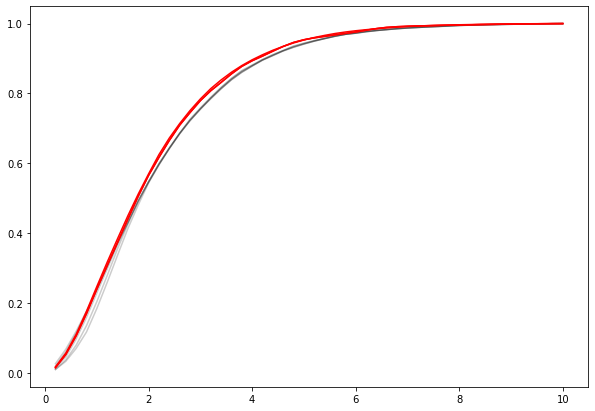

In [10]:
for gal in ['G0','G1','G2','G3']:
    plot_mass_normal(filename='plots_normalizados/masa_acumulada_star_normalizado'+gal+'.jpg')

In [11]:
for gal in ['G0','G1','G2','G3']:
    plot_gas_normal(filename='plots_normalizados/masa_acumulada_gas_normalizado'+gal+'.jpg')

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  w

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

## Plots Generalizados

#### Para estrellas

In [11]:
def promedio_mass_star(mini,maxi,step,ruta):
    radio = []
    masa_mediana = []
    for snap in np.arange(mini,maxi,step):
        snap = str(snap).zfill(3)
        data_ruta = pynbody.load(ruta+'/'+gal+'/snapshot_'+snap+'.hdf5')
        bins, mass, histo, histo_normal =accumulated_normal_mass(data_ruta.star['pos'],data_ruta.star['mass'],
                                                        n=int(limites_star[gal][1]*5),limits=limites_star[gal])
        masa_mediana.append(list(histo_normal))
    radio.append(list(bins))
        
    return masa_mediana, radio

### Calculo teorico

### Extraccion de los radios

In [12]:
def radio(ruta,mini,maxi,step):
    radio = []
    for gal in ['G0','G1','G2','G3']:
        try:
            for snap in np.arange(mini,maxi,step):
                snap = str(snap).zfill(3)
                data_ruta = pynbody.load(ruta+'/'+gal+'/snapshot_'+snap+'.hdf5')
                bins, mass, histo, histo_normal =accumulated_normal_mass(data_ruta.star['pos'],data_ruta.star['mass'],
                                         n=int(limites_star[gal][1]*5),limits=limites_star[gal])
            radio.append(list(bins))
        except:
            pass
    return radio

In [13]:
radios = radio(data_nuevo,2,4,1)

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(


In [14]:
r_G0 = np.array(radios[0])
r_G1 = np.array(radios[1])
r_G2 = np.array(radios[2])
r_G3 = np.array(radios[3])

### Extraccion de los valores de mediana

In [15]:
def mediana(mini,maxi,step,ruta):
        masa, radio = promedio_mass_star(mini,maxi,step,ruta)
        df = pd.DataFrame(masa)
        #Revisar si transponerlo o no
        df = df.transpose()
        df2 = pd.DataFrame()
        df2['Mediana'] = df.median(axis=1)
        df2['Desviacion']=df.std(axis=1)
        # Revisar radios
        mediana_viejos = df2['Mediana'].values
        desviacion_viejos = df2['Desviacion'].values
        
        return df2

#### Valores para las simulaciones viejas (G0 y G1)

In [16]:
# Listas para datos de las simulaciones viejas
for gal in ['G0']:
    dataframe_G0_old = mediana(100,700,200,data_viejo)
for gal in ['G1']:
    dataframe_G1_old = mediana(100,700,200,data_viejo)
# Extraccion de la mediana
mediana_G0_old = dataframe_G0_old['Mediana'].to_numpy()
mediana_G1_old = dataframe_G1_old['Mediana'].to_numpy()    

In [17]:
# Listas para datos de simulaciones nuevas
for gal in ['G0']:
    dataframe_G0_new = mediana(0,601,1,data_nuevo)
for gal in ['G1']:
    dataframe_G1_new = mediana(0,601,1,data_nuevo)
# Extracion de la mediana
mediana_G0_new = dataframe_G0_new['Mediana'].to_numpy()
mediana_G1_new = dataframe_G1_new['Mediana'].to_numpy()

#### Valores para las simulaciones nuevas unicamente (G2 y G3)

In [18]:
# Listas para datos de simulaciones nuevas
for gal in ['G2']:
    dataframe_G2_new = mediana(0,601,1,data_nuevo)
for gal in ['G3']:
    dataframe_G3_new = mediana(0,601,1,data_nuevo)
# Extracion de la mediana
mediana_G2_new = dataframe_G2_new['Mediana'].to_numpy()
mediana_G3_new = dataframe_G3_new['Mediana'].to_numpy()

#### Planteamiento de la funcion teorica de masa

In [19]:
def function_mass(h,x):
    masa_model = 1 - (1/h)*np.exp(-x/h)*(x+h)
    return masa_model

#### Optimizacion

#### Para G0

In [20]:
def Error_mass_old_G0(tpl,x,y):
    return function_mass(tpl,r_G0)-mediana_G0_old

In [21]:
def Error_mass_new_G0(tpl,x,y):
    return function_mass(tpl,r_G0)-mediana_G0_new

In [22]:
p0 = [1.1] # Valor teorico de h (Revisar paper de referencia)
best_old_G0, n = leastsq(Error_mass_old_G0, p0, args=(r_G0,mediana_G0_old))
print(best_old_G0)
masa_teorica_G0_old = function_mass(best_old_G0,r_G0)

[1.04829331]


In [23]:
p0 = [1.1]
best_new_G0,n = leastsq(Error_mass_new_G0, p0, args=(r_G0,mediana_G0_new))
print(best_new_G0)
masa_teorica_G0_new = function_mass(best_new_G0,r_G0)

[1.20683664]


#### Para G1

In [24]:
def Error_mass_old_G1(tpl,x,y):
    return function_mass(tpl,r_G1)-mediana_G1_old

In [25]:
def Error_mass_new_G1(tpl,x,y):
    return function_mass(tpl,r_G1)-mediana_G1_new

In [26]:
p0 = [1.5] # Valor teorico de h (Revisar paper de referencia)
best_old_G1, n = leastsq(Error_mass_old_G1, p0, args=(r_G1,mediana_G1_old))
print(best_old_G1)
masa_teorica_G1_old = function_mass(best_old_G1,r_G1)

[1.44079693]


In [27]:
p0 = [1.5]
best_new_G1,n = leastsq(Error_mass_new_G1, p0, args=(r_G1,mediana_G1_new))
print(best_new_G1)
masa_teorica_G1_new = function_mass(best_new_G1,r_G1)

[1.48688736]


#### Para G2

In [28]:
def Error_mass_new_G2(tpl,x,y):
    return function_mass(tpl,r_G2)-mediana_G2_new

In [29]:
p0 = [1.9]
best_new_G2,n = leastsq(Error_mass_new_G2, p0, args=(r_G2,mediana_G2_new))
print(best_new_G2)
masa_teorica_G2_new = function_mass(best_new_G2,r_G2)

[1.84108464]


#### Para G3

In [30]:
def Error_mass_new_G3(tpl,x,y):
    return function_mass(tpl,r_G3)-mediana_G3_new

In [31]:
p0 = [2.8]
best_new_G3,n = leastsq(Error_mass_new_G3, p0, args=(r_G3,mediana_G3_new))
print(best_new_G3)
masa_teorica_G3_new = function_mass(best_new_G3,r_G3)

[2.68346318]


### Funcion para generar los plots

In [34]:
def plots_star(filename):
    fig = plt.figure(figsize=(10, 7))
    try:
        masa_mediana, radio = promedio_mass_star(100,700,200,data_viejo)
        df = pd.DataFrame(masa_mediana)
        #Revisar si transponerlo o no
        df = df.transpose()
        df2 = pd.DataFrame()
        df2['Mediana'] = df.median(axis=1)
        # Revisar radios
        df3 = pd.DataFrame(radio)
        df3 = df3.transpose()
        df3.columns = ['Radios']
        mediana = df2['Mediana'].values
        radio = df3['Radios'].values
        plt.plot(radio,mediana,'-r',label='Old Galaxies')
    except:
        pass
    masa_mediana, radio = promedio_mass_star(0,601,1,data_nuevo)
    df = pd.DataFrame(masa_mediana)
    df = df.transpose()
    df2 = pd.DataFrame()
    df2['Mediana'] = df.median(axis=1)
    df3 = pd.DataFrame(radio)
    df3 = df3.transpose()
    df3.columns = ['Radios']
    mediana = df2['Mediana'].values
    radio = df3['Radios'].values
    plt.plot(radio,mediana,'-k',label='New Galaxies')
    if gal == 'G0':
        plt.plot(r_G0,masa_teorica_G0_old,'-g',label='Old Galaxies Teorica '+'h = {a}'.format(a = best_old_G0))
        plt.plot(r_G0,masa_teorica_G0_new ,'-b',label='New Galaxies Teorica '+'h = {a}'.format(a = best_new_G0))
        plt.title('Masa acumulada de Estrellas '+ gal+ 'h=1.1', fontsize= 20)
    if gal == 'G1':
        plt.plot(r_G1,masa_teorica_G1_old,'-g',label='Old Galaxies Teorica '+'h = {a}'.format(a = best_old_G1))
        plt.plot(r_G1,masa_teorica_G1_new ,'-b',label='New Galaxies Teorica '+'h = {a}'.format(a = best_new_G1))
        plt.title('Masa acumulada de Estrellas '+ gal+ 'h=1.5', fontsize= 20)
    if gal == 'G2':
        plt.plot(r_G2,masa_teorica_G2_new ,'-b',label='New Galaxies Teorica '+'h = {a}'.format(a = best_new_G2))
        plt.title('Masa acumulada de Estrellas '+ gal+ 'h=1.9', fontsize= 20)
    if gal == 'G3':
        plt.plot(r_G3,masa_teorica_G3_new ,'-b',label='New Galaxies Teorica '+'h = {a}'.format(a = best_new_G3))
        plt.title('Masa acumulada de Estrellas '+ gal+ 'h=2.8', fontsize= 20)
    else:
        pass
    plt.xlabel('Radio [Kpc]',fontsize=18)
    plt.ylabel('Masa Acumulada (10$^{10}$ $M_\odot$)',fontsize=18)
    plt.legend()
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()    

### Plots con la informacion integrada (Medianas)

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(


KeyboardInterrupt: 

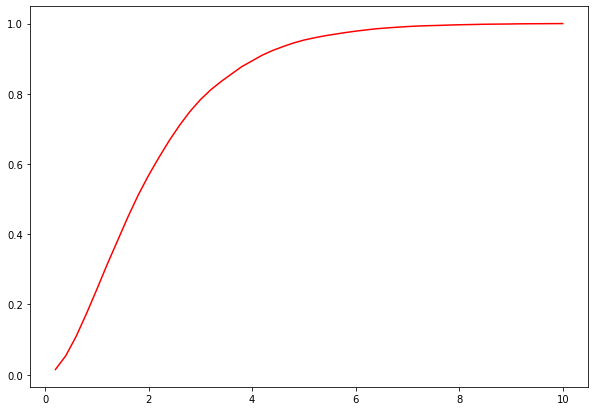

In [33]:
for gal in ['G0','G1','G2','G3']:
    plots_star(filename='plots_generales/masa_acumulada_star_'+gal+'.jpg')

### Plots con la informacion teorica incluida

In [35]:
for gal in ['G0','G1','G2','G3']:
    plots_star(filename='plots_generales/masa_acumulada_star_teorica'+gal+'.jpg')

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

### Para gas

In [36]:
def promedio_mass_gas(mini,maxi,step,ruta):
    radio = []
    masa_mediana = []
    
    for snap in np.arange(mini,maxi,step):
        snap = str(snap).zfill(3)
        data_ruta = pynbody.load(ruta+'/'+gal+'/snapshot_'+snap+'.hdf5')
        bins, mass, histo, histo_normal =accumulated_normal_mass(data_ruta.gas['pos'],data_ruta.gas['mass'],
                                                        n=int(limites_gas[gal][1]*5),limits=limites_gas[gal])
        masa_mediana.append(list(histo_normal))
    radio.append(list(bins))
        
    return masa_mediana, radio

### Calculo teorico

### Extraccion de los radios

In [37]:
def radio_gas(ruta,mini,maxi,step):
    radio_gas = []
    for gal in ['G0','G1','G2','G3']:
        try:
            for snap in np.arange(mini,maxi,step):
                snap = str(snap).zfill(3)
                data_ruta = pynbody.load(ruta+'/'+gal+'/snapshot_'+snap+'.hdf5')
                bins, mass, histo, histo_normal =accumulated_normal_mass(data_ruta.gas['pos'],data_ruta.gas['mass'],
                                                        n=int(limites_gas[gal][1]*5),limits=limites_gas[gal])
            radio_gas.append(list(bins))
        except:
            pass
    return radio_gas

In [38]:
radios_gas = radio_gas(data_nuevo,2,4,1)

r_G0_gas = np.array(radios_gas[0])
r_G1_gas = np.array(radios_gas[1])
r_G2_gas = np.array(radios_gas[2])
r_G3_gas = np.array(radios_gas[3])

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(


### Extraccion de los valores de mediana

In [39]:
def mediana_gas(mini,maxi,step,ruta):
        masa, radio = promedio_mass_gas(mini,maxi,step,ruta)
        df = pd.DataFrame(masa)
        #Revisar si transponerlo o no
        df = df.transpose()
        df2 = pd.DataFrame()
        df2['Mediana'] = df.median(axis=1)
        df2['Desviacion']=df.std(axis=1)
        # Revisar radios
        mediana_viejos = df2['Mediana'].values
        desviacion_viejos = df2['Desviacion'].values
        
        return df2

#### Valores para las simulaciones viejas (G0 y G1)

In [40]:
# Listas para datos de las simulaciones viejas
for gal in ['G0']:
    dataframe_G0_old_gas = mediana_gas(100,700,200,data_viejo)
for gal in ['G1']:
    dataframe_G1_old_gas = mediana_gas(100,700,200,data_viejo)

# Extraccion de la mediana
mediana_G0_old_gas = dataframe_G0_old_gas['Mediana'].to_numpy()
mediana_G1_old_gas = dataframe_G1_old_gas['Mediana'].to_numpy()  

In [41]:
# Listas para datos de simulaciones nuevas
for gal in ['G0']:
    dataframe_G0_new_gas = mediana_gas(0,601,1,data_nuevo)
for gal in ['G1']:
    dataframe_G1_new_gas = mediana_gas(0,601,1,data_nuevo)
# Extracion de la mediana
mediana_G0_new_gas = dataframe_G0_new_gas['Mediana'].to_numpy()
mediana_G1_new_gas = dataframe_G1_new_gas['Mediana'].to_numpy()

#### Valores para las simulaciones nuevas unicamente (G2 y G3)

In [42]:
# Listas para datos de simulaciones nuevas
for gal in ['G2']:
    dataframe_G2_new_gas = mediana_gas(0,601,1,data_nuevo)
for gal in ['G3']:
    dataframe_G3_new_gas = mediana_gas(0,601,1,data_nuevo)
# Extracion de la mediana
mediana_G2_new_gas = dataframe_G2_new_gas['Mediana'].to_numpy()
mediana_G3_new_gas = dataframe_G3_new_gas['Mediana'].to_numpy()

#### Planteamiento de la funcion teorica de masa

In [44]:
def function_mass(h,x):
    masa_model = 1 - (1/h)*np.exp(-x/h)*(x+h)
    return masa_model

#### Optimizacion

#### Para G0

In [45]:
def Error_mass_old_G0_gas(tpl,x,y):
    return function_mass(tpl,r_G0_gas)-mediana_G0_old_gas

def Error_mass_new_G0_gas(tpl,x,y):
    return function_mass(tpl,r_G0_gas)-mediana_G0_new_gas

In [46]:
p0 = [3.3] # Valor teorico de h (Revisar paper de referencia)
best_old_G0_gas, n = leastsq(Error_mass_old_G0_gas, p0, args=(r_G0_gas,mediana_G0_old_gas))
print(best_old_G0_gas)
masa_teorica_G0_old_gas = function_mass(best_old_G0_gas,r_G0_gas)


best_new_G0_gas,n = leastsq(Error_mass_new_G0_gas, p0, args=(r_G0,mediana_G0_new_gas))
print(best_new_G0_gas)
masa_teorica_G0_new_gas = function_mass(best_new_G0_gas,r_G0_gas)

[3.32565883]
[1.5696294]


#### Para G1

In [47]:
def Error_mass_old_G1_gas(tpl,x,y):
    return function_mass(tpl,r_G1_gas)-mediana_G1_old_gas

def Error_mass_new_G1_gas(tpl,x,y):
    return function_mass(tpl,r_G1_gas)-mediana_G1_new_gas

p0 = [4.5] # Valor teorico de h (Revisar paper de referencia)
best_old_G1_gas, n = leastsq(Error_mass_old_G1_gas, p0, args=(r_G1_gas,mediana_G1_old_gas))
print(best_old_G1_gas)
masa_teorica_G1_old_gas = function_mass(best_old_G1_gas,r_G1_gas)

best_new_G1_gas,n = leastsq(Error_mass_new_G1_gas, p0, args=(r_G1_gas,mediana_G1_new_gas))
print(best_new_G1_gas)
masa_teorica_G1_new_gas = function_mass(best_new_G1_gas,r_G1_gas)

[4.7659178]
[4.54093125]


#### Para G2

In [48]:
def Error_mass_new_G2_gas(tpl,x,y):
    return function_mass(tpl,r_G2_gas)-mediana_G2_new_gas

p0 = [5.7]
best_new_G2_gas,n = leastsq(Error_mass_new_G2_gas, p0, args=(r_G2_gas,mediana_G2_new_gas))
print(best_new_G2_gas)
masa_teorica_G2_new_gas = function_mass(best_new_G2_gas,r_G2_gas)

[6.00044519]


#### Para G3

In [49]:
def Error_mass_new_G3_gas(tpl,x,y):
    return function_mass(tpl,r_G3_gas)-mediana_G3_new_gas

p0 = [8.4]
best_new_G3_gas,n = leastsq(Error_mass_new_G3_gas, p0, args=(r_G3,mediana_G3_new_gas))
print(best_new_G3_gas)
masa_teorica_G3_new_gas = function_mass(best_new_G3_gas,r_G3_gas)

[9.43328172]


### Funcion para generar los plots

In [50]:
def plots_gas(filename):
    fig = plt.figure(figsize=(10, 7))
    try:
        masa_mediana, radio = promedio_mass_gas(100,700,200,data_viejo)
        df = pd.DataFrame(masa_mediana)
        df = df.transpose()
        df2 = pd.DataFrame()
        df2['Mediana'] = df.median(axis=1)
        df3 = pd.DataFrame(radio)
        df3 = df3.transpose()
        df3.columns = ['Radios']
        mediana = df2['Mediana'].values
        radio = df3['Radios'].values
        plt.plot(radio,mediana,'-r',label='Old Galaxies')
    except:
        pass
    masa_mediana, radio = promedio_mass_gas(0,601,1,data_nuevo)
    df = pd.DataFrame(masa_mediana)
    df = df.transpose()
    df2 = pd.DataFrame()
    df2['Mediana'] = df.median(axis=1)
    df3 = pd.DataFrame(radio)
    df3 = df3.transpose()
    df3.columns = ['Radios']
    mediana = df2['Mediana'].values
    radio = df3['Radios'].values
    plt.plot(radio,mediana,'-k',label='New Galaxies')
    if gal == 'G0':
        plt.plot(r_G0_gas,masa_teorica_G0_old_gas,'-g',label='Old Galaxies Teorica '+'h = {a}'.format(a = best_old_G0_gas))
        plt.plot(r_G0_gas,masa_teorica_G0_new_gas ,'-b',label='New Galaxies Teorica '+'h = {a}'.format(a = best_new_G0_gas))
        plt.title('Masa acumulada de Gas '+ gal+' h=3.3', fontsize= 20)
    if gal == 'G1':
        plt.plot(r_G1_gas,masa_teorica_G1_old_gas,'-g',label='Old Galaxies Teorica '+'h = {a}'.format(a = best_old_G1_gas))
        plt.plot(r_G1_gas,masa_teorica_G1_new_gas,'-b',label='New Galaxies Teorica '+'h = {a}'.format(a = best_new_G1_gas))
        plt.title('Masa acumulada de Gas '+ gal+' h=4.5', fontsize= 20)
    if gal == 'G2':
        plt.plot(r_G2_gas,masa_teorica_G2_new_gas,'-b',label='New Galaxies Teorica '+'h = {a}'.format(a = best_new_G2_gas))
        plt.title('Masa acumulada de Gas '+ gal+' h=5.7', fontsize= 20)
    if gal == 'G3':
        plt.plot(r_G3_gas,masa_teorica_G3_new_gas,'-b',label='New Galaxies Teorica '+'h = {a}'.format(a = best_new_G3_gas))
        plt.title('Masa acumulada de Gas '+ gal+' h=8.4', fontsize= 20)
    else:
        pass
    plt.xlabel('Radio [Kpc]',fontsize=18)
    plt.ylabel('Masa Acumulada (10$^{10}$ $M_\odot$)',fontsize=18)
    plt.legend()
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close() 

### Generacion de plots

In [ ]:
# Unicamente con las medianas
for gal in ['G0','G1','G2','G3']:
    plots_gas(filename='plots_generales/masa_acumulada_gas_'+gal+'.jpg')

In [51]:
# Con el valor teorico
for gal in ['G0','G1','G2','G3']:
    plots_gas(filename='plots_generales/masa_acumulada_gas_teorico'+gal+'.jpg')

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

#### Plots con desviacion estandar

#### Para estrellas

In [11]:
def promedio_mass_star(mini,maxi,step,ruta):
    radio = []
    masa = []
    for snap in np.arange(mini,maxi,step):
        snap = str(snap).zfill(3)
        data_ruta = pynbody.load(ruta+'/'+gal+'/snapshot_'+snap+'.hdf5')
        bins, mass, histo, histo_normal =accumulated_normal_mass(data_ruta.star['pos'],data_ruta.star['mass'],
                                                        n=int(limites_star[gal][1]*5),limits=limites_star[gal])
        masa.append(list(histo_normal))
        
    radio.append(list(bins))
        
    return masa, radio

In [12]:
def plots_star_desviacion(filename):
    fig = plt.figure(figsize=(10, 7))
    try:
        masa, radio = promedio_mass_star(100,700,200,data_viejo)
        df = pd.DataFrame(masa)
        #Revisar si transponerlo o no
        df = df.transpose()
        df2 = pd.DataFrame()
        df2['Mediana'] = df.median(axis=1)
        df2['Desviacion']=df.std(axis=1)
        # Revisar radios
        df3 = pd.DataFrame(radio)
        df3 = df3.transpose()
        df3.columns = ['Radios']
        mediana_viejos = df2['Mediana'].values
        desviacion_viejos = df2['Desviacion'].values
        radio = df3['Radios'].values
        plt.plot(radio,mediana_viejos,'-r',linewidth=2,zorder=10,label='Old Galaxies')
        plt.plot(radio,mediana_viejos+desviacion_viejos,linestyle='--',color=red)
        plt.plot(radio,mediana_viejos-desviacion_viejos,linestyle='--',color=red)
    except:
        pass
    masa_mediana, radio = promedio_mass_star(0,601,1,data_nuevo)
    df = pd.DataFrame(masa_mediana)
    df = df.transpose()
    df2 = pd.DataFrame()
    df2['Mediana'] = df.median(axis=1)
    df2['Desviacion']=df.std(axis=1)
    df3 = pd.DataFrame(radio)
    df3 = df3.transpose()
    df3.columns = ['Radios']
    mediana_nuevos = df2['Mediana'].values
    desviacion_nuevos = df2['Desviacion'].values
    radio = df3['Radios'].values
    plt.plot(radio,mediana_nuevos,color='black',linestyle='-',linewidth=3,label='New Galaxies')
    plt.plot(radio,mediana_nuevos+desviacion_nuevos,color='black',linestyle='--',linewidth=1)
    plt.plot(radio,mediana_nuevos-desviacion_nuevos,color='black',linestyle='--',linewidth=1)
    plt.fill_between(radio,mediana_nuevos-desviacion_nuevos,mediana_nuevos+desviacion_nuevos,color='gray')
    plt.title('Masa acumulada de Estrellas '+ gal, fontsize= 20)
    plt.xlabel('Radio [Kpc]',fontsize=18)
    plt.ylabel('Masa Acumulada (10$^{10}$ $M_\odot$)',fontsize=18)
    plt.legend()
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close()

In [13]:
for gal in ['G0','G1','G2','G3']:
    plots_star_desviacion(filename='plots_generales/masa_acumulada_star_desviacion'+gal+'.jpg')

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un

#### Para gas

In [14]:
def promedio_mass_gas(mini,maxi,step,ruta):
    radio = []
    masa = []
    
    for snap in np.arange(mini,maxi,step):
        snap = str(snap).zfill(3)
        data_ruta = pynbody.load(ruta+'/'+gal+'/snapshot_'+snap+'.hdf5')
        bins, mass, histo, histo_normal =accumulated_normal_mass(data_ruta.gas['pos'],data_ruta.gas['mass'],
                                                        n=int(limites_gas[gal][1]*5),limits=limites_gas[gal])
        masa.append(list(histo_normal))
    radio.append(list(bins))
        
    return masa, radio

In [15]:
def plots_gas_desviacion(filename):
    fig = plt.figure(figsize=(10, 7))
    try:
        masa, radio = promedio_mass_gas(100,700,200,data_viejo)
        df = pd.DataFrame(masa)
        df = df.transpose()
        df2 = pd.DataFrame()
        df2['Mediana'] = df.median(axis=1)
        df2['Desviacion']=df.std(axis=1)
        df3 = pd.DataFrame(radio)
        df3 = df3.transpose()
        df3.columns = ['Radios']
        mediana = df2['Mediana'].values
        desviacion = df2['Desviacion'].values
        radio = df3['Radios'].values
        plt.plot(radio,mediana,'-r',linewidth=2,zorder=10,label='Old Galaxies')
        plt.plot(radio,mediana+desviacion,linestyle='--',color=red)
        plt.plot(radio,mediana-desviacion,linestyle='--',color=red)
        
    except:
        pass
    masa, radio = promedio_mass_gas(0,601,1,data_nuevo)
    df = pd.DataFrame(masa)
    df = df.transpose()
    df2 = pd.DataFrame()
    df2['Mediana'] = df.median(axis=1)
    df2['Desviacion']=df.std(axis=1)
    df3 = pd.DataFrame(radio)
    df3 = df3.transpose()
    df3.columns = ['Radios']
    mediana = df2['Mediana'].values
    desviacion = df2['Desviacion'].values
    radio = df3['Radios'].values
    plt.plot(radio,mediana,color='black',linestyle='-',linewidth=2,label='New Galaxies')
    plt.plot(radio,mediana+desviacion,color='yellow',linestyle='--',linewidth=1)
    plt.plot(radio,mediana-desviacion,color='yellow',linestyle='--',linewidth=1)
    plt.fill_between(radio,mediana-desviacion,mediana+desviacion,color='paleturquoise')
    plt.title('Masa acumulada de Gas '+ gal, fontsize= 20)
    plt.xlabel('Radio [Kpc]',fontsize=18)
    plt.ylabel('Masa Acumulada (10$^{10}$ $M_\odot$)',fontsize=18)
    plt.legend()
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    plt.close() 

In [16]:
for gal in ['G0','G1','G2','G3']:
    plots_gas_desviacion(filename='plots_generales/masa_acumulada_gas_desviacion'+gal+'.jpg')

/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No unit information found: using gadget-units.
  warnings.warn(
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/home/danna01/.local/lib/python3.8/site-packages/pynbody/snapshot/gadgethdf.py:572: RuntimeWarning: No un